In [15]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, TimeDistributed, GRU
from keras.optimizers import Adam

In [2]:
matfn = u'D:\\学习\\OneDrive\\研究生论文\\毕业论文相关\\脑机\\程序\\原模型\\SimulationResults\\训练数据delta为1.mat'
data = sio.loadmat(matfn)
P = np.array(data['P']).T
T = np.array(data['m'])
P_Train = P[:189800, :]
T_Train = T[:189800, :]
P_Test = P[189800:, :]
T_Test = T[189800:, :]
P_Test.dtype

dtype('<f8')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
stdsc = StandardScaler()
P_Train = stdsc.fit_transform(P_Train)
P_Test = stdsc.transform(P_Test)
joblib.dump(stdsc, "stdsc.m")
P_Test.dtype

dtype('<f8')

In [4]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
# mmc = MinMaxScaler()
# P_Train = mmc.fit_transform(P_Train)
# P_Test = mmc.transform(P_Test)
# joblib.dump(mmc, "mmc.m")

In [5]:
P_Train = P_Train.reshape(189800,1,60)
# T_Train = T_Train.reshape(189800,1,1)
P_Test = P_Test.reshape(43800,1,60)
# T_Test = T_Test.reshape(43800,1,1)
print(P_Train.shape)

(189800, 1, 60)


In [6]:
batchStart = 0
timeStep = 1
batchSize = 1
inputSize = 60
outputSize = 1
cellSize = 20
LR = 0.001

In [7]:
# model = Sequential()
# # model.add(Dense(60, input_shape=(10, 60, )))
# # model.add(Activation('relu'))
# model.add(LSTM(
#     batch_input_shape=(batchSize, timeStep, inputSize),
#     units=cellSize,
#     return_sequences=True,
#     stateful=False,
# ))
# model.add(TimeDistributed(Dense(outputSize)))

# adam = Adam(LR)
# model.compile(optimizer='adam', loss='mse')

In [8]:
input_dim = 60
output_dim = 1
model = Sequential()
model.add(GRU(units=32, input_shape=(None, 60), recurrent_dropout=0.2, activation="tanh", return_sequences=True))
model.add(GRU(units=32, input_shape=(None, 32), recurrent_dropout=0.2, activation="tanh", return_sequences=True))
model.add(GRU(units=16, input_shape=(None, 32), recurrent_dropout=0.2, activation="tanh", return_sequences=True))
model.add(GRU(units=16, input_shape=(None, 16), recurrent_dropout=0.2, activation="relu"))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam')

In [9]:
# history = model.fit(P_Train, T_Train, batch_size=batchSize, epochs=50,
#                     validation_data=(P_Test, T_Test))
# history = model.fit(P_Train, T_Train, batch_size=batchSize, epochs=7)
history = model.fit(P_Train, T_Train, batch_size=146, epochs=30,
                    validation_data=(P_Test, T_Test))

Train on 189800 samples, validate on 43800 samples
Epoch 1/30
189800/189800 [==============================] - 12s 63us/step - loss: 1.8920e-05 - val_loss: 9.1686e-07
Epoch 2/30
189800/189800 [==============================] - 8s 44us/step - loss: 6.3126e-07 - val_loss: 5.8536e-07
Epoch 3/30
189800/189800 [==============================] - 9s 48us/step - loss: 5.0573e-07 - val_loss: 2.3151e-07
Epoch 4/30
189800/189800 [==============================] - 9s 48us/step - loss: 4.8424e-07 - val_loss: 2.6885e-07
Epoch 5/30
189800/189800 [==============================] - 9s 46us/step - loss: 3.7842e-07 - val_loss: 2.3947e-07
Epoch 6/30
189800/189800 [==============================] - 9s 49us/step - loss: 3.4764e-07 - val_loss: 2.7238e-07
Epoch 7/30
189800/189800 [==============================] - 9s 49us/step - loss: 3.5151e-07 - val_loss: 5.0963e-07
Epoch 8/30
189800/189800 [==============================] - 9s 47us/step - loss: 3.4482e-07 - val_loss: 1.3184e-06
Epoch 9/30
189800/189800 [==

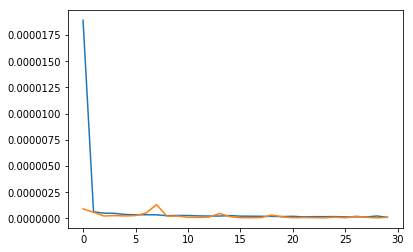

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
# print(history.history)

In [11]:
pred = model.predict(P_Test)

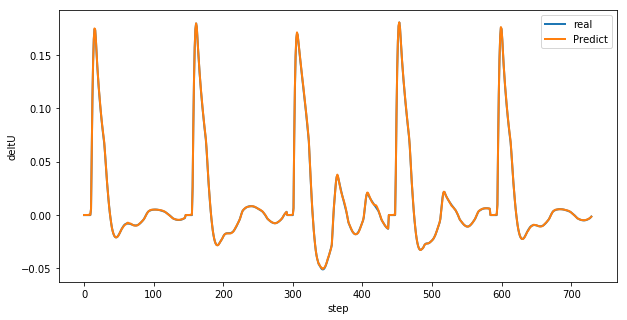

In [12]:
plt.figure(figsize=(10,5))
plt.plot(T_Test[0:730], linewidth=2, label='real')
plt.plot(pred[0:730], linewidth=2, label='Predict')
plt.xlabel('step')
plt.ylabel('deltU')
plt.legend()
plt.show()

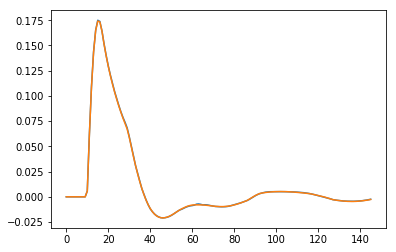

In [13]:
pred = []
real = []
for i in range(0, 146):
    if i <= 9:
        pred.append(0)
        real.append(T_Test[i])
    else:
        Predarray = P_Test[i,0,:].reshape(1,1,60)
        predNum = model.predict(Predarray)
        pred.append(predNum)
        real.append(T_Test[i])
plt.plot(pred)
plt.plot(real)
plt.show()

In [14]:
model.save('GRU_11_20_15_30.h5')